In [83]:
import csv
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
arra = []
with open('16-09-27.csv') as file:
    reader = csv.reader(file, delimiter='\t')
    a = 0
    for row in reader:
        if(a==0):
            a+=1
            continue
#         if(a==10):
#             break
        arr = np.array(row)
        if(arr[7]==""):
            arr[7]=arr[9]
        if(arr[8]==""):
            arr[8]=arr[10]
        arr = np.delete(arr,(9,10))
        
        arra.append(arr)
#         a += 1
#     print(arr)
#     print(ar)
file.close()
 
# arra = np.array(ar)
columns = ['frameNumber','timeRelative','frame.len','protocolNumber','protocolName','ipSrc','ipDst','srcPort','dstPort','ipDSCP','ethsrc','ethdst']

df = pd.DataFrame(data=arra,columns=columns)
# print(df)
# df.head(5)
features = ['frameNumber','timeRelative','frame.len','protocolNumber','protocolName','ipSrc','ipDst','srcPort','dstPort','ipDSCP']

# print(arra)
X = df[features]
# print(X)
# X.head()
y1 = df['ethsrc']
# print(y1)
# y1.head()
y2 = df['ethdst']
# print(y2)

# X, y1 = shuffle(X, y1, random_state=0)
# print(X, y1)
# print("here")
df

,frameNumber,timeRelative,frame.len,protocolNumber,protocolName,ipSrc,ipDst,srcPort,dstPort,ipDSCP,ethsrc,ethdst
0,1,0.000000000,156,6,eth:ethertype:ip:tcp:tls,192.168.1.106,52.87.241.159,40767,443,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
1,2,0.220575000,66,6,eth:ethertype:ip:tcp,52.87.241.159,192.168.1.106,443,40767,0,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2
2,3,0.537609000,284,6,eth:ethertype:ip:tcp:tls,192.168.1.106,52.87.241.159,40767,443,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
3,4,2.075699000,156,6,eth:ethertype:ip:tcp:tls,192.168.1.106,52.87.241.159,40767,443,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
4,5,2.186605000,90,17,eth:ethertype:ip:udp:ntp,139.59.177.198,192.168.1.196,123,4967,6,14:cc:20:51:33:ea,d0:52:a8:00:67:5e
...,...,...,...,...,...,...,...,...,...,...,...,...
527030,527031,86398.649904000,42,,eth:ethertype:arp,,,,,,f4:f2:6d:93:51:f1,14:cc:20:51:33:ea
527031,527032,86398.698987000,156,6,eth:ethertype:ip:tcp:tls,192.168.1.106,52.87.241.159,40767,443,0,30:8c:fb:2f:e4:b2,14:cc:20:51:33:ea
527032,527033,86398.904135000,66,6,eth:ethertype:ip:tcp,52.87.241.159,192.168.1.106,443,40767,0,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2
527033,527034,86399.490511000,118,1,eth:ethertype:ip:icmp:data,192.168.1.223,192.168.1.1,,,0,ec:1a:59:79:f4:89,14:cc:20:51:33:ea


In [35]:
categories = [X[column].unique() for column in textCols]
cat_colwise = categories
print(categories)

[array(['eth:ethertype:ip:tcp:tls', 'eth:ethertype:ip:tcp',
       'eth:ethertype:ip:udp:ntp', 'eth:ethertype:ip:udp:dns',
       'eth:ethertype:ip:icmp:data', 'eth:ethertype:ip:udp:data',
       'eth:ethertype:ip:udp:udpencap', 'eth:ethertype:arp',
       'eth:ethertype:ip:udp:ssdp', 'eth:ethertype:ip:udp:udpencap:esp',
       'eth:ethertype:ip:tcp:stun', 'eth:ethertype:ip:tcp:data',
       'eth:ethertype:ip:igmp:igmp', 'eth:ethertype:ip:tcp:http',
       'eth:ethertype:ip:tcp:http:xml',
       'eth:ethertype:ipv6:ipv6.hopopts:icmpv6',
       'eth:ethertype:ip:udp:nbdgm:smb:browser',
       'eth:ethertype:ip:tcp:sip',
       'eth:ethertype:ip:tcp:tls:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509ce:x509ce:x509ce:x509ce:x509ce:pkix1explicit:pkix1implicit:x509ce:x509ce:pkix1implicit:tls:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509sat:x509ce:x509ce:x509ce:pkix1implicit:x509ce:pkix1explicit:pkix1implicit:x509ce:x509sat:x509ce:x

In [84]:
# ar = arra
# # print(ar)
# listProto = set(ar[:,4])
# listProto = list(listProto)
# print(listProto)
# X.loc[X['ipDSCP']=='48,0', ['ipDSCP']] = '480'


catCols = ['frameNumber','timeRelative','frame.len','protocolNumber','srcPort','dstPort','ipDSCP']
for col in catCols:
    X[col] = pd.to_numeric(X[col],errors='coerce')
# X['frameNumber'] = pd.to_numeric(X['frameNumber'])
# X.astype({'frameNumber':'int32','timeRelative':'float64','frame.len':'int32','protocolNumber':'int32'}).dtypes
# intCols intCols= X.columns[X.dtypes=='int32']
X.dtypes
# X.astype({'srcPort':'int32'}).dtypes

textCols = ['protocolName', 'ipSrc', 'ipDst']

for col in textCols:
    X.loc[X[col]=='',[col]] = "missing"
# categories = [X[column].unique() for column in textCols]
# cat_colwise = categories
# print(categories)

# categories = [item for sublist in categories for item in sublist]
# categories = list(set(categories))

# i = 0
# test = map(i+1, categories)

# categories = categories[1:]
# print(categories)
# print(list(test))



# print(X[2547:2548])
# X.head(50)

<ipython-input-84-9093db7d7c42>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col],errors='coerce')
/home/deepak/.local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [85]:
X.dtypes

frameNumber         int64
timeRelative      float64
frame.len           int64
protocolNumber    float64
protocolName       object
ipSrc              object
ipDst              object
srcPort           float64
dstPort           float64
ipDSCP            float64
dtype: object

In [86]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=-1)
imp.fit(X)
# n = imp.transform(X[textCols])
# a = 0
# for i in n:
#     print(i)
#     a+=1
#     if(a==50):
#         break



Xt = imp.transform(X)
X = pd.DataFrame(data=Xt,columns=features)



X.head(33)


,frameNumber,timeRelative,frame.len,protocolNumber,protocolName,ipSrc,ipDst,srcPort,dstPort,ipDSCP
0,1,0,156,6,eth:ethertype:ip:tcp:tls,192.168.1.106,52.87.241.159,40767,443,0
1,2,0.220575,66,6,eth:ethertype:ip:tcp,52.87.241.159,192.168.1.106,443,40767,0
2,3,0.537609,284,6,eth:ethertype:ip:tcp:tls,192.168.1.106,52.87.241.159,40767,443,0
3,4,2.0757,156,6,eth:ethertype:ip:tcp:tls,192.168.1.106,52.87.241.159,40767,443,0
4,5,2.18661,90,17,eth:ethertype:ip:udp:ntp,139.59.177.198,192.168.1.196,123,4967,6
5,6,2.2979,66,6,eth:ethertype:ip:tcp,52.87.241.159,192.168.1.106,443,40767,0
6,7,3.10816,156,6,eth:ethertype:ip:tcp:tls,192.168.1.106,52.87.241.159,40767,443,0
7,8,3.24103,268,17,eth:ethertype:ip:udp:dns,192.168.1.1,192.168.1.241,53,35876,0
8,9,3.24699,98,1,eth:ethertype:ip:icmp:data,192.168.1.241,62.210.177.216,-1,-1,0
9,10,3.32833,66,6,eth:ethertype:ip:tcp,52.87.241.159,192.168.1.106,443,40767,0


In [87]:
Xt

array([[1, 0.0, 156, ..., 40767.0, 443.0, 0.0],
       [2, 0.220575, 66, ..., 443.0, 40767.0, 0.0],
       [3, 0.537609, 284, ..., 40767.0, 443.0, 0.0],
       ...,
       [527033, 86398.904135, 66, ..., 443.0, 40767.0, 0.0],
       [527034, 86399.490511, 118, ..., -1, -1, 0.0],
       [527035, 86399.49063, 118, ..., -1, -1, 0.0]], dtype=object)

In [88]:
enc = OrdinalEncoder(dtype=np.float64)
enc.fit(X)
# enc.categories_
X_enc = enc.transform(X)
X = pd.DataFrame(data=X_enc,columns=features)
X.tail(33)

,frameNumber,timeRelative,frame.len,protocolNumber,protocolName,ipSrc,ipDst,srcPort,dstPort,ipDSCP
527002,527002.0,527002.0,95.0,3.0,31.0,65.0,231.0,2855.0,8.0,1.0
527003,527003.0,527003.0,12.0,3.0,8.0,219.0,67.0,8.0,2842.0,1.0
527004,527004.0,527004.0,99.0,3.0,31.0,68.0,195.0,4924.0,4878.0,1.0
527005,527005.0,527005.0,12.0,3.0,8.0,69.0,316.0,4455.0,23.0,1.0
527006,527006.0,527006.0,95.0,3.0,31.0,65.0,231.0,2855.0,8.0,1.0
527007,527007.0,527007.0,67.0,3.0,31.0,185.0,70.0,4906.0,4896.0,1.0
527008,527008.0,527008.0,5.0,3.0,8.0,68.0,195.0,4924.0,4878.0,1.0
527009,527009.0,527009.0,12.0,3.0,8.0,303.0,72.0,23.0,4430.0,1.0
527010,527010.0,527010.0,12.0,3.0,8.0,219.0,67.0,8.0,2842.0,1.0
527011,527011.0,527011.0,95.0,3.0,31.0,65.0,231.0,2855.0,8.0,1.0


In [91]:
# WRITING LIST TO A FILE
list_of_array = enc.categories_
# with open('cat_list.txt','w') as fi:
#     for item in list_of_array:
#         fi.write('%s\n' %item)
pickle.dump(list_of_array,open('cat_lists.txt','wb'))
list_of_array

[array([1, 2, 3, ..., 527033, 527034, 527035], dtype=object),
 array([0.0, 0.220575, 0.537609, ..., 86398.904135, 86399.490511,
        86399.49063], dtype=object),
 array([20, 38, 42, 43, 46, 54, 55, 58, 59, 60, 61, 62, 66, 68, 70, 71, 72,
        73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 127, 130, 131, 132, 134,
        135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
        149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162,
        163, 164, 165, 166, 167, 170, 171, 172, 173, 174, 175, 176, 177,
        178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191,
        192, 193, 194, 195, 198, 199, 200, 201, 202, 203, 204, 205, 206,
        207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
        220, 221, 222, 223

In [92]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le1.fit(y1)
label = le1.classes_
y = le1.transform(y1)
le2 = LabelEncoder()
le2.fit(y2)
print(le2.classes_)
le2.transform(y2)
print(label)


['00:16:6c:ab:6b:88' '00:24:e4:11:18:a8' '00:24:e4:1b:6f:96'
 '01:00:5e:00:00:01' '01:00:5e:00:00:16' '01:00:5e:00:00:fb'
 '01:00:5e:00:01:3c' '01:00:5e:7f:ff:fa' '08:21:ef:3b:fc:e3'
 '14:cc:20:51:33:e9' '14:cc:20:51:33:ea' '18:b4:30:25:be:e4'
 '18:b7:9e:02:20:44' '30:8c:fb:2f:e4:b2' '33:33:00:00:00:01'
 '33:33:00:00:00:02' '33:33:00:00:00:0c' '33:33:00:00:00:16'
 '33:33:00:00:00:fb' '33:33:00:01:00:02' '33:33:00:01:00:03'
 '33:33:ff:00:00:00' '33:33:ff:00:00:01' '33:33:ff:00:0e:e2'
 '33:33:ff:18:34:43' '33:33:ff:25:be:e4' '33:33:ff:27:7a:6e'
 '33:33:ff:33:bb:85' '33:33:ff:3b:fc:e3' '33:33:ff:51:33:ea'
 '33:33:ff:79:f4:89' '33:33:ff:83:28:11' '33:33:ff:99:e7:24'
 '33:33:ff:ab:6b:88' '33:33:ff:e4:9b:c0' '33:33:ff:fe:a5:7d'
 '44:65:0d:56:cc:d3' '50:c7:bf:00:56:39' '70:5a:0f:e4:9b:c0'
 '70:ee:50:03:b8:ac' '70:ee:50:18:34:43' 'd0:52:a8:00:67:5e'
 'e0:76:d0:33:bb:85' 'ec:1a:59:79:f4:89' 'ec:1a:59:83:28:11'
 'f4:f2:6d:93:51:f1' 'ff:ff:ff:ff:ff:ff']
['00:16:6c:ab:6b:88' '00:24:e4:11:18:a8' '0

In [93]:
from numpy import savetxt
savetxt('featureInput27.csv',X,delimiter=',')
savetxt('label.csv',y,delimiter=',')
# save le1


In [94]:
from numpy import loadtxt

X = loadtxt('featureInput27.csv',delimiter=',')
y = loadtxt('label.csv',delimiter=',')

In [95]:
# START MODEL HERE!!
##########################################################
#################################
#######################################

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)  89
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)   90
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)    0.8991643834576765
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier() 
classifier=classifier.fit(X_train,y_train) 
predicted=classifier.predict(X_test)

print('done')

done


In [96]:
classifier.feature_importances_
classifier.score(X_test,y_test)

0.8999057624074226

In [97]:
import pickle
filename = 'final_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [98]:
classifier.predict_proba(X_test)[:-33]

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.01]])

In [99]:
from sklearn.model_selection import cross_val_score
import numpy as np
cv = cross_val_score(classifier, X_train, y_train, cv=10)
print(cv)
print(np.mean(cv))
# scores
print("CV")

[0.90095682 0.89908655 0.90361315 0.89952023 0.90377318 0.90306842
 0.89938198 0.9012252  0.90163179 0.9021197 ]
0.9014377014616869
CV


In [100]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

print ('Confusion Matrix :') 
CM = confusion_matrix(y_test, predicted, normalize="pred")
CM_not = confusion_matrix(y_test,predicted)
print(CM) 
# print('le1 classes:', le1.classes_)

Confusion Matrix :
[[9.15698337e-01 2.83286119e-04 0.00000000e+00 6.88231246e-04
  7.81374351e-03 0.00000000e+00 3.99733511e-03 1.89639369e-04
  1.78909703e-03 7.84313725e-03 7.58087880e-02 1.62866450e-03
  1.55179363e-02 0.00000000e+00 3.00870942e-02 2.75119617e-02
  1.76937157e-02 9.05192949e-03]
 [7.59474444e-05 8.92351275e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.10091743e-01 0.00000000e+00
  0.00000000e+00 1.39214801e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.76417342e-04]
 [0.00000000e+00 0.00000000e+00 9.40000000e-01 0.00000000e+00
  2.89397908e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.10482004e-04 0.00000000e+00 4.82858522e-04 2.17155266e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.51894889e-04 1.41643059e-04 0.00000000e+00 8.81624226e-01
  1.93896598e-03 0.00000000e+00 1.53231179e-02 1.89639369e-04
  3.15723006e-

In [101]:

print ('Accuracy Score :',accuracy_score(y_test, predicted)) 

Accuracy Score : 0.8999057624074226


In [102]:
print ('Report : ') 
print (classification_report(y_test, predicted))

Report : 
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     13083
         1.0       0.89      0.88      0.89      7147
         2.0       0.94      0.84      0.89        56
         3.0       0.88      0.87      0.88      1475
         4.0       0.93      0.92      0.92     69636
         5.0       0.92      0.83      0.87        29
         6.0       0.67      0.67      0.67      1501
         7.0       0.97      0.97      0.97     31530
         8.0       0.91      0.91      0.91      9467
         9.0       0.64      0.66      0.65       494
        10.0       0.47      0.48      0.48      1994
        11.0       0.93      0.92      0.93      1861
        12.0       0.68      0.71      0.69      4763
        13.0       0.84      0.85      0.84      4388
        14.0       0.68      0.69      0.69      1244
        15.0       0.62      0.63      0.63      2457
        16.0       0.81      0.82      0.81      4858
        17.0     

In [22]:
# X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=0)
# classifier2 = RandomForestClassifier()
# classifier2.fit(X_train, y2_train)
# predicted2 = classifier2.predict(X_test)

# print ('Confusion Matrix :') 
# print(confusion_matrix(y2_test, predicted2)) 
# print ('Accuracy Score :',accuracy_score(y2_test, predicted2)) 
# print ('Report : ') 
# print (classification_report(y2_test, predicted2)) 


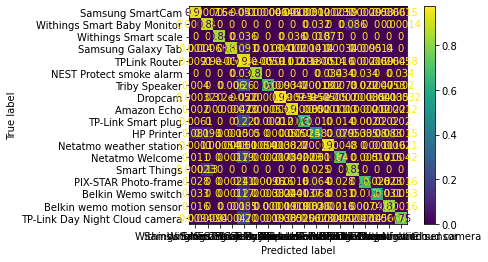

In [103]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.metrics import plot_confusion_matrix

mac_to_device = {'00:16:6c:ab:6b:88':'Samsung SmartCam', '00:24:e4:11:18:a8':'Withings Smart Baby Monitor', '00:24:e4:1b:6f:96':'Withings Smart scale',
                '08:21:ef:3b:fc:e3':'Samsung Galaxy Tab', '14:cc:20:51:33:ea':'TPLink Router', '18:b4:30:25:be:e4':'NEST Protect smoke alarm',
                 '18:b7:9e:02:20:44':'Triby Speaker', '30:8c:fb:2f:e4:b2':'Dropcam','44:65:0d:56:cc:d3':'Amazon Echo', 
                 '50:c7:bf:00:56:39':'TP-Link Smart plug', '70:5a:0f:e4:9b:c0':'HP Printer', '70:ee:50:03:b8:ac':'Netatmo weather station', 
                 '70:ee:50:18:34:43':'Netatmo Welcome',  'd0:52:a8:00:67:5e':'Smart Things', 'e0:76:d0:33:bb:85':'PIX-STAR Photo-frame',
                 'ec:1a:59:79:f4:89':'Belkin Wemo switch', 'ec:1a:59:83:28:11':'Belkin wemo motion sensor', 'f4:f2:6d:93:51:f1':'TP-Link Day Night Cloud camera', 
                    }
devices = [d for d in mac_to_device.values()]

# print(le1.transform(label))
plot_confusion_matrix(classifier, X_test, y_test, normalize='true', display_labels=devices, include_values=True)

Text(141.0, 0.5, 'Truth')

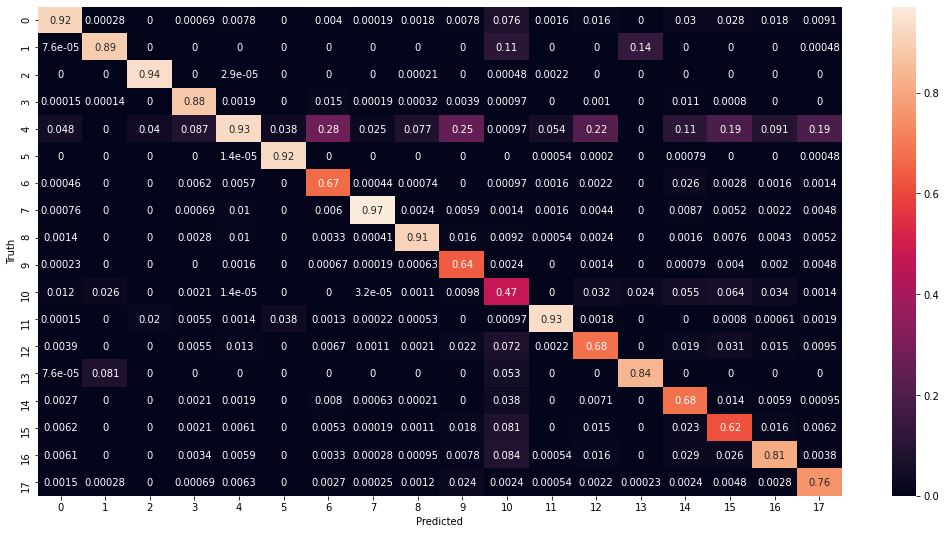

In [104]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(18,9))
sn.heatmap(CM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [105]:
import pandas as pd# CMd = pd.DataFrame(CM, columns=devices, index=le1.classes_)

CMd = pd.DataFrame(CM_not, columns=devices, index=devices)

CMd.head(18)


,Samsung SmartCam,Withings Smart Baby Monitor,Withings Smart scale,Samsung Galaxy Tab,TPLink Router,NEST Protect smoke alarm,Triby Speaker,Dropcam,Amazon Echo,TP-Link Smart plug,HP Printer,Netatmo weather station,Netatmo Welcome,Smart Things,PIX-STAR Photo-frame,Belkin Wemo switch,Belkin wemo motion sensor,TP-Link Day Night Cloud camera
Samsung SmartCam,12057,2,0,1,540,0,6,6,17,4,157,3,77,0,38,69,87,19
Withings Smart Baby Monitor,1,6300,0,0,0,0,0,0,0,0,228,0,0,617,0,0,0,1
Withings Smart scale,0,0,47,0,2,0,0,0,2,0,1,4,0,0,0,0,0,0
Samsung Galaxy Tab,2,1,0,1281,134,0,23,6,3,2,2,0,5,0,14,2,0,0
TPLink Router,636,0,2,126,64143,1,413,798,733,126,2,100,1083,0,143,479,448,403
NEST Protect smoke alarm,0,0,0,0,1,24,0,0,0,0,0,1,1,0,1,0,0,1
Triby Speaker,6,0,0,9,395,0,1003,14,7,0,2,3,11,0,33,7,8,3
Dropcam,10,0,0,1,701,0,9,30710,23,3,3,3,22,0,11,13,11,10
Amazon Echo,19,0,0,4,689,0,5,13,8644,8,19,1,12,0,2,19,21,11
TP-Link Smart plug,3,0,0,0,109,0,1,6,6,326,5,0,7,0,1,10,10,10


In [106]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1Score, support = precision_recall_fscore_support(y_test, predicted)
print(precision, recall, f1Score, support)

[0.91569834 0.89235127 0.94       0.88162423 0.9281425  0.92307692
 0.66822119 0.9706375  0.90970322 0.63921569 0.46644133 0.93431053
 0.68037082 0.83686823 0.68012668 0.62041467 0.80780964 0.75797999] [0.92157762 0.88148874 0.83928571 0.86847458 0.92111839 0.82758621
 0.66822119 0.97399302 0.91306644 0.65991903 0.48445336 0.92477163
 0.70879698 0.8452598  0.69051447 0.63329263 0.81762042 0.74765038] [0.91862857 0.88688675 0.88679245 0.875      0.9246171  0.87272727
 0.66822119 0.97231237 0.91138173 0.64940239 0.47527675 0.92951661
 0.69429306 0.84104308 0.68528121 0.62678751 0.81268542 0.75277975] [13083  7147    56  1475 69636    29  1501 31530  9467   494  1994  1861
  4763  4388  1244  2457  4858  2128]


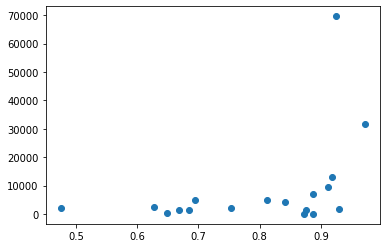

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(f1Score, support)

In [108]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, predicted)

0.795949476771868

In [109]:
classifier.score(X,y)

0.9699374804329883

In [110]:
enc.categories_

[array([1, 2, 3, ..., 527033, 527034, 527035], dtype=object),
 array([0.0, 0.220575, 0.537609, ..., 86398.904135, 86399.490511,
        86399.49063], dtype=object),
 array([20, 38, 42, 43, 46, 54, 55, 58, 59, 60, 61, 62, 66, 68, 70, 71, 72,
        73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 127, 130, 131, 132, 134,
        135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
        149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162,
        163, 164, 165, 166, 167, 170, 171, 172, 173, 174, 175, 176, 177,
        178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191,
        192, 193, 194, 195, 198, 199, 200, 201, 202, 203, 204, 205, 206,
        207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
        220, 221, 222, 223